# This is a simple Multie User Massive MIMO simulation
Author: Pedro Ivo da Cruz

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

## Definition of the QPSK Modulator
This function takes a random imput containing '1' and '0' uniformly distributed with equal probability and converts them into qpsk symbols. It also accepts a average power parameter and a phase_offset parameter in rad.

In [2]:
def bin2gray(bi):
    order = bi.shape[1]
    lin = bi.shape[0]
    g = np.zeros((lin, order))
    
    idx = 0
    for bits in bi:
        g[idx, 0] = int(bits[0])
        for l in range(1, order):
            g[idx, l] = int(bits[l] ^ bits[l-1])
        idx = idx + 1
    
    return g

# arr = np.array([[0, 0, 0], [0, 1, 0], [0, 1, 1], [1, 1, 0]])
# code = bin2gray(arr)
# print(arr)
# print(code)

In [3]:
def qpskmodulator(input_bits, average_power = 1, phase_offset = np.pi/4):
    
    # Generate symbols
    symbols = np.array([1, 1j, -1, -1j])*np.exp(1j*phase_offset)
    symbols = np.sqrt(average_power)*symbols
    
    input_arr = input_bits.reshape((int(len(input_bits)/2)), 2)
    gray_code = bin2gray(input_arr)
    
    output = [] # Pre allocate in the future to prevent unnecessary memory usage
    for symbol in gray_code:
#         print(symbol)
        s = int(2*symbol[0] + symbol[1])
        output.append(symbols[s])
    
    return np.array(output)

## Testing the QPSK modulation

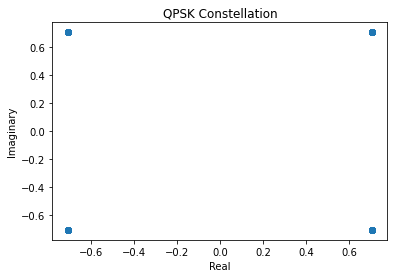

In [4]:
number_bits = 1000
bitStream = np.random.choice([0, 1], number_bits)
symb = qpskmodulator(bitStream)
av_pow = np.sum(np.square(np.abs(symb)))/len(symb)
# print(symb)
# print(av_pow)

plt.scatter(symb.real, symb.imag)
plt.title('QPSK Constellation')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

## Definition of the AWGN function
This function adds the additive white Gaussian Noise to the signal

In [5]:
def awgn(sig, SNR, sig_power = 1):
    # SNR in dB
    
    SNR_linear = 10**(SNR/10) #SNR to linear scale
    noise_power = sig_power/SNR_linear; # Noise power
    
    dim = sig.shape
    if not np.isreal(sig[1]):
        noise = np.sqrt(noise_power/2)*(np.random.normal(0 , 1, dim)
                                  + 1j*np.random.normal(0 , 1, dim))
    else:
        noise = np.sqrt(noise_power)*np.random.normal(0 , 1, dim)
    
    sig_noisy = sig + noise
    
    return sig_noisy

## Testing the AWGN function

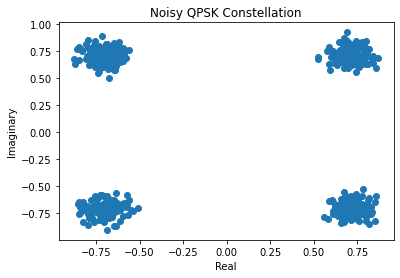

In [6]:
SNR = 20; # SNR in dB
y_noisy = awgn(symb, SNR)

plt.scatter(y_noisy.real, y_noisy.imag)
plt.title('Noisy QPSK Constellation')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

## Simulates Channel Fading

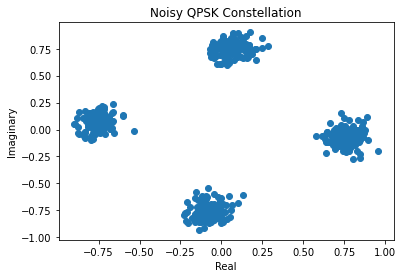

In [10]:
SNR = 20
L = 1
h = np.sqrt(0.5)*(np.random.normal(0, 1, L) + 1j*np.random.normal(0, 1, L))
y_chan = sig.lfilter(h, 1, symb)
y = awgn(y_chan, SNR)

plt.scatter(y.real, y.imag)
plt.title('Noisy QPSK Constellation')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

## Simulates Equalization at the Receiver

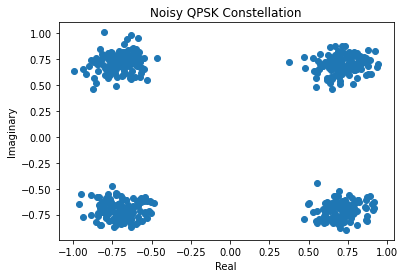

In [11]:
y_eq = y/h

plt.scatter(y_eq.real, y_eq.imag)
plt.title('Noisy QPSK Constellation')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()